## Acquiring data and Vizualization

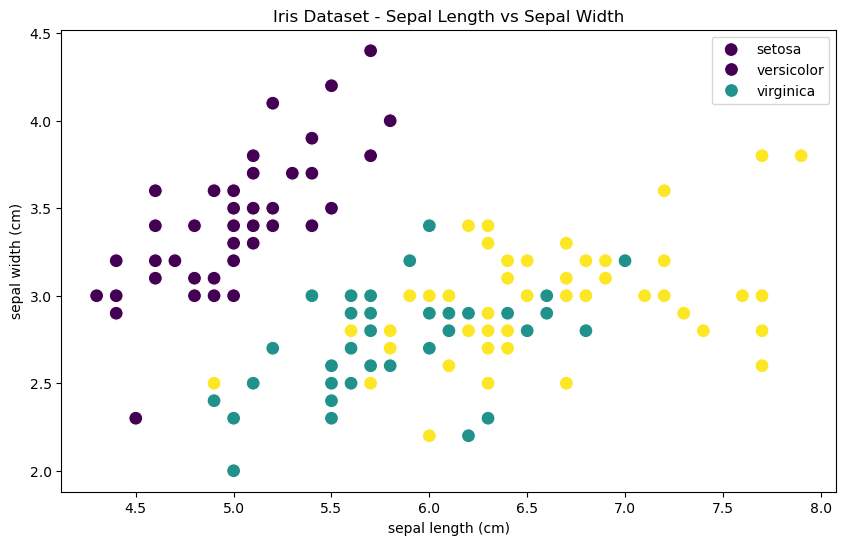

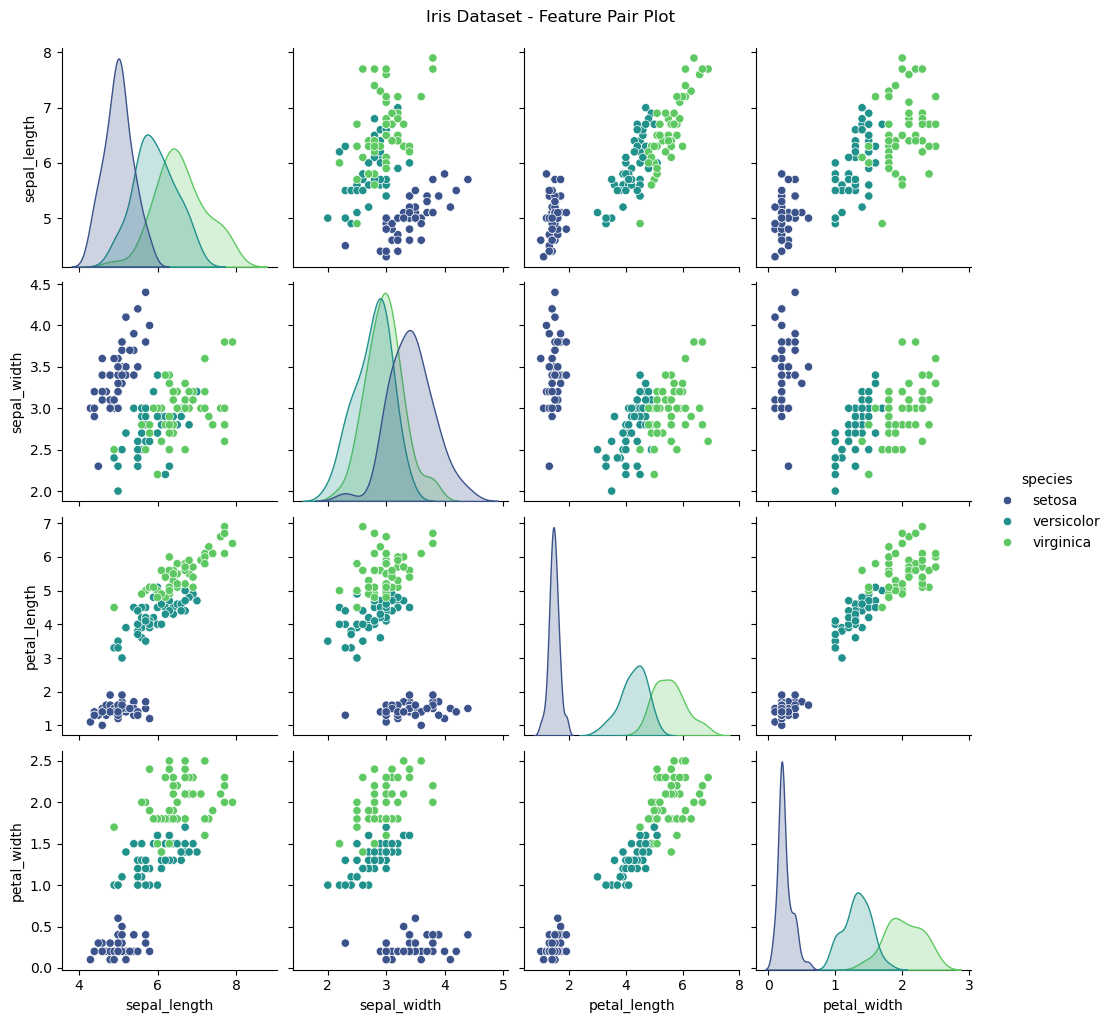

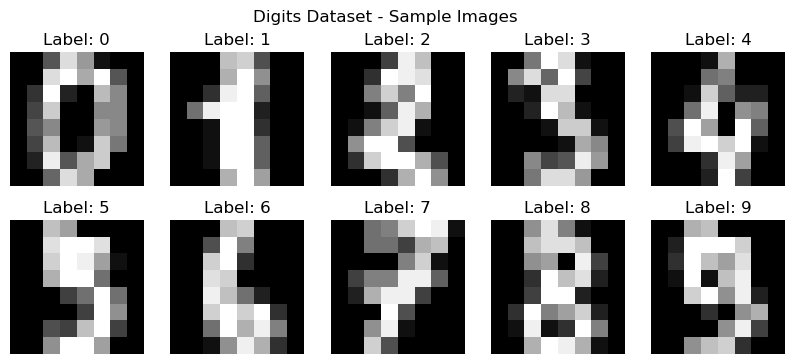

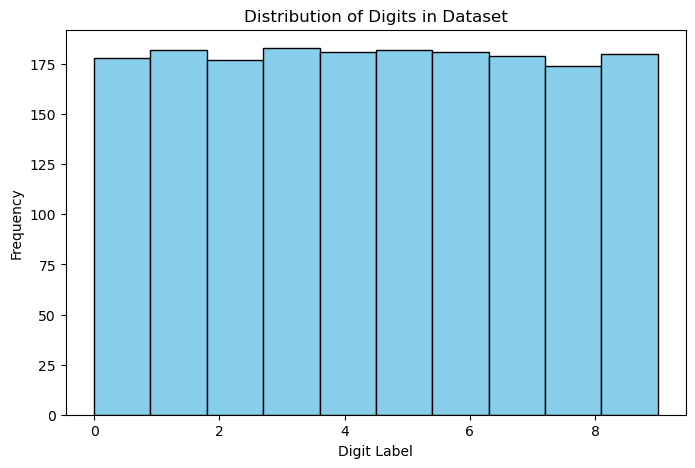

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import numpy as np

# Load the Iris dataset
iris = datasets.load_iris()
iris_data = iris.data
iris_target = iris.target
iris_feature_names = iris.feature_names
iris_target_names = iris.target_names

# Scatter plot for the Iris dataset
plt.figure(figsize=(10, 6))
sns.scatterplot(x=iris_data[:, 0], y=iris_data[:, 1], hue=iris_target, palette="viridis", s=100)
plt.xlabel(iris_feature_names[0])
plt.ylabel(iris_feature_names[1])
plt.title("Iris Dataset - Sepal Length vs Sepal Width")
plt.legend(iris_target_names)
plt.show()

# Pairplot to show relationships between features
iris_df = sns.load_dataset("iris")  # load iris as a dataframe for easy plotting with seaborn
sns.pairplot(iris_df, hue="species", palette="viridis", diag_kind="kde")
plt.suptitle("Iris Dataset - Feature Pair Plot", y=1.02)
plt.show()

# Load the digits dataset
digits = datasets.load_digits()
digits_data = digits.data
digits_images = digits.images
digits_target = digits.target

# Plot the first few images of the Digits dataset
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(digits_images[i], cmap="gray")
    ax.set_title(f"Label: {digits_target[i]}")
    ax.axis("off")
plt.suptitle("Digits Dataset - Sample Images")
plt.show()

# Plot a histogram of digit counts
plt.figure(figsize=(8, 5))
plt.hist(digits_target, bins=10, edgecolor='black', color='skyblue')
plt.xlabel("Digit Label")
plt.ylabel("Frequency")
plt.title("Distribution of Digits in Dataset")
plt.show()


## dessciion tree model 

Model Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



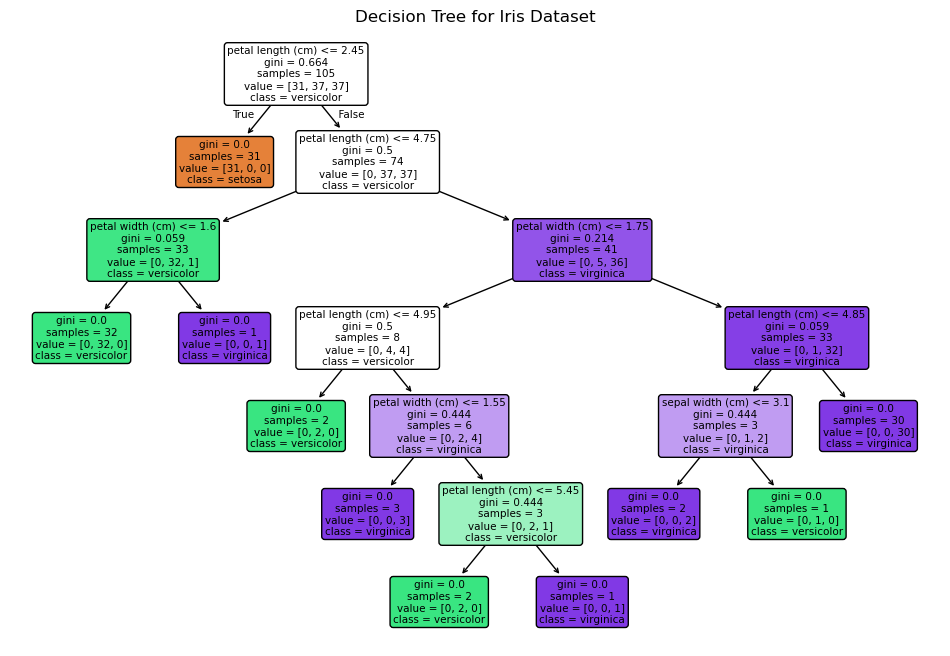

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

# Plot the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.title("Decision Tree for Iris Dataset")
plt.show()

## Secon decsion tree

/home/dragon/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dragon/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dragon/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


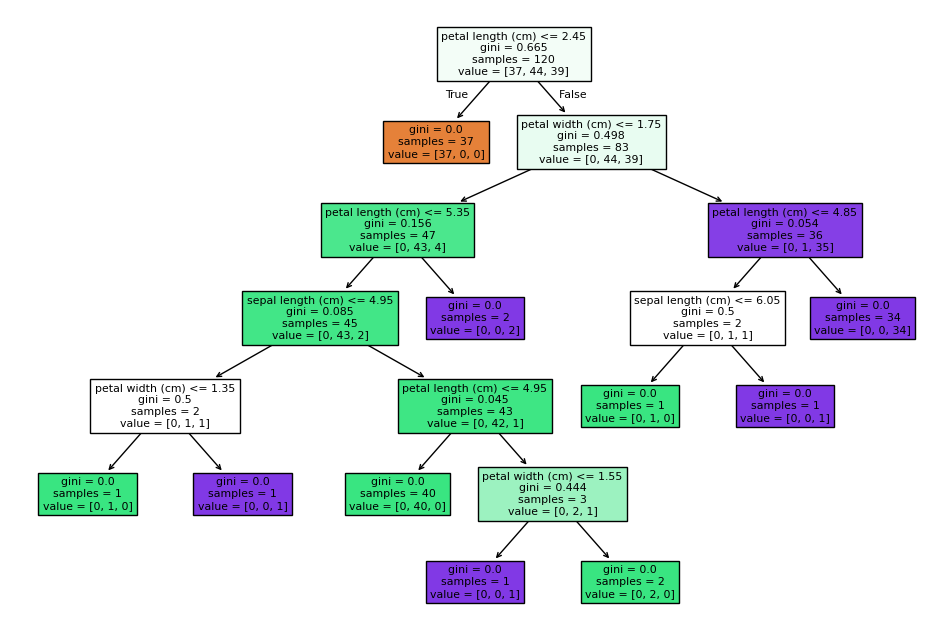

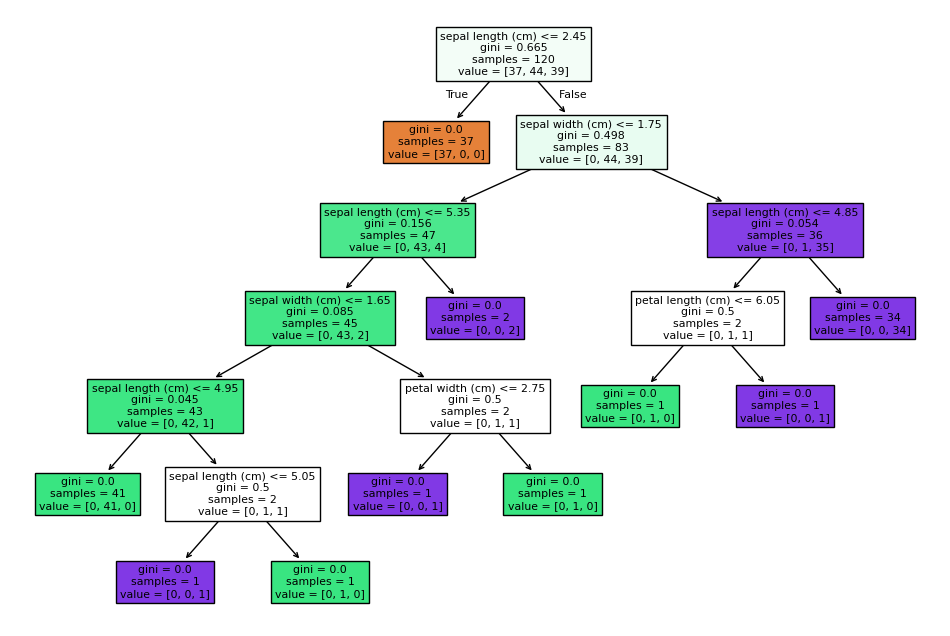

Confusion Matrix for Model 1:
 [[13  0  0]
 [ 0  6  0]
 [ 0  1 10]]
Classification Report for Model 1:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.86      1.00      0.92         6
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Confusion Matrix for Model 2:
 [[ 0  5  8]
 [ 0  0  6]
 [ 0  0 11]]
Classification Report for Model 2:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.00      0.00      0.00         6
           2       0.44      1.00      0.61        11

    accuracy                           0.37        30
   macro avg       0.15      0.33      0.20        30
weighted avg       0.16      0.37      0.22        30

Confusion Matrix for Random Fo

In [7]:
# Import necessary libraries
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Decision Tree Model 1 (using Sepal.Length and Sepal.Width for the first split)
model1 = DecisionTreeClassifier(random_state=123)
model1.fit(X_train[:, [0, 1, 2, 3]], y_train)  # Using all features but with a different split order

# Decision Tree Model 2 (using Petal.Length and Petal.Width for the first split)
model2 = DecisionTreeClassifier(random_state=123)
model2.fit(X_train[:, [2, 3, 0, 1]], y_train)  # Different feature order

# Random Forest Model
rf_model = RandomForestClassifier(random_state=123)
rf_model.fit(X_train, y_train)

# Predictions
predictions_model1 = model1.predict(X_test)
predictions_model2 = model2.predict(X_test)
predictions_rf = rf_model.predict(X_test)

# Confusion Matrix and Classification Report
confusion_matrix1 = confusion_matrix(y_test, predictions_model1)
confusion_matrix2 = confusion_matrix(y_test, predictions_model2)
confusion_matrix_rf = confusion_matrix(y_test, predictions_rf)

report1 = classification_report(y_test, predictions_model1)
report2 = classification_report(y_test, predictions_model2)
report_rf = classification_report(y_test, predictions_rf)

# Plotting decision trees
plt.figure(figsize=(12, 8))
plt.title("Decision Tree Model 1")
plot_tree(model1, feature_names=feature_names, filled=True)
plt.show()

plt.figure(figsize=(12, 8))
plt.title("Decision Tree Model 2")
plot_tree(model2, feature_names=feature_names, filled=True)
plt.show()

# Display results
print("Confusion Matrix for Model 1:\n", confusion_matrix1)
print("Classification Report for Model 1:\n", report1)

print("Confusion Matrix for Model 2:\n", confusion_matrix2)
print("Classification Report for Model 2:\n", report2)

print("Confusion Matrix for Random Forest:\n", confusion_matrix_rf)
print("Classification Report for Random Forest:\n", report_rf)


## Random Forest Model 

Random Forest Model Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



/tmp/ipykernel_12806/3240143491.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=iris.feature_names, y=feature_importances, palette="viridis")


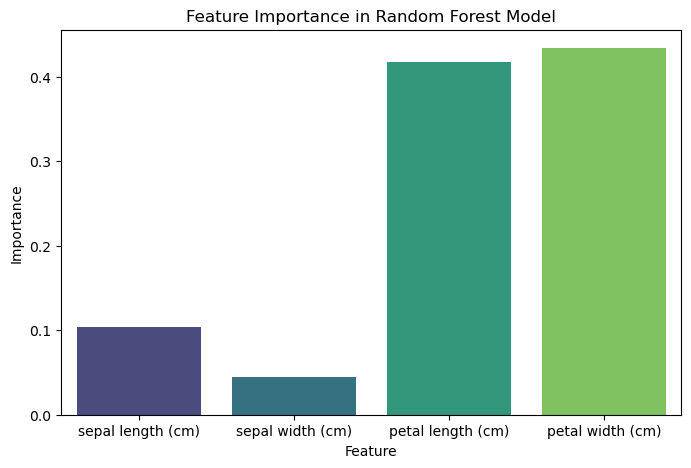

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

# Feature Importance
feature_importances = rf_clf.feature_importances_
plt.figure(figsize=(8, 5))
sns.barplot(x=iris.feature_names, y=feature_importances, palette="viridis")
plt.title("Feature Importance in Random Forest Model")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


# Model Comparison

In [5]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize both models
dt_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train and predict with Decision Tree
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

# Train and predict with Random Forest
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Evaluate both models
dt_accuracy = accuracy_score(y_test, y_pred_dt)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print("Decision Tree Model Performance:")
print(f"Accuracy: {dt_accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_dt, target_names=iris.target_names))

print("\nRandom Forest Model Performance:")
print(f"Accuracy: {rf_accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf, target_names=iris.target_names))

# Summary of comparison
print("\nModel Comparison Summary:")
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

if rf_accuracy > dt_accuracy:
    print("Random Forest performs better based on accuracy.")
elif dt_accuracy > rf_accuracy:
    print("Decision Tree performs better based on accuracy.")
else:
    print("Both models have the same accuracy.")


Decision Tree Model Performance:
Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Random Forest Model Performance:
Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Model Comparison Summary:
Decision Tree Accuracy: 1.00
Random Forest Accuracy: 1.00
Both mod

In [6]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate MSE and RMSE for Decision Tree model
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_rmse = np.sqrt(dt_mse)

# Calculate MSE and RMSE for Random Forest model
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)

# Display MSE and RMSE for both models
print("Decision Tree Model Performance:")
print(f"MSE: {dt_mse:.2f}")
print(f"RMSE: {dt_rmse:.2f}")

print("\nRandom Forest Model Performance:")
print(f"MSE: {rf_mse:.2f}")
print(f"RMSE: {rf_rmse:.2f}")

# Summary of comparison
print("\nMSE and RMSE Comparison Summary:")
print(f"Decision Tree MSE: {dt_mse:.2f}, RMSE: {dt_rmse:.2f}")
print(f"Random Forest MSE: {rf_mse:.2f}, RMSE: {rf_rmse:.2f}")

if rf_rmse < dt_rmse:
    print("Random Forest performs better based on RMSE.")
elif dt_rmse < rf_rmse:
    print("Decision Tree performs better based on RMSE.")
else:
    print("Both models have the same RMSE.")


Decision Tree Model Performance:
MSE: 0.00
RMSE: 0.00

Random Forest Model Performance:
MSE: 0.00
RMSE: 0.00

MSE and RMSE Comparison Summary:
Decision Tree MSE: 0.00, RMSE: 0.00
Random Forest MSE: 0.00, RMSE: 0.00
Both models have the same RMSE.
